In [310]:
# Grafica las curvas IDT.

import pandas as pd
import xarray as xr

from scipy import stats

from matplotlib import pyplot as plt

In [311]:
i = 3

name = [ "CHIRPS_comp", "CHIRPS_megalopolis", "prec_hist_comp_CHIRPS",
    "prec_hist_comp_estaciones", "prec_hist_hist" ]


path_gev = "../results/" + name[i] + "/" + name[i] + "_idf_gev.nc"
path_val = "../results/" + name[i] + "/" + name[i] + "_idf_valores.nc" 
path_ret = "../results/" + name[i] + "/" + name[i] + "_tretorno.nc" 

ds_gev = xr.open_dataset(path_gev)
ds_val = xr.open_dataset(path_val)
ds_ret = xr.open_dataset(path_ret)#.drop( ["AÑO", "PROBABILIDAD"] )

# W: número de longitud.
# N: número de latitud.
# D: duración.
# T: tiempo de retorno.
W = 6
N = 0
D = 4   # [horas]
T = 200 # [años ]

In [312]:
# Utilizar información medida o calculada con distribución.
RET = True
#RET = False
if RET:
    ds_i = ds_ret
    ret = "valores medidos"
else:
    ds_i = ds_val
    ret = "distribución GEV"

# Utilizar unidades de precipitación o de intensidad.
#PRE = True
PRE = False
pre   = "mm"
p_esp = ""
if PRE:
    p_name = "Precipitación"
    p_D = D
else:
    p_name = "Intensidad"
    pre   += "/h"
    p_esp += "   "
    p_D      = 1

LON = ds_i["LONGITUD"].isel( LONGITUD = W ).values
LAT = ds_i["LATITUD" ].isel( LATITUD  = N ).values

In [313]:
# Calcula una intensidad con la distribución GEV.

param = ds_gev.isel( {"LONGITUD": W, "LATITUD": N}
    ).to_dataframe().loc[D]
GEV = stats.genextreme(*param.iloc[0:3])

print("Intensidad de precipitación obtenida con distribución GEV")
print( f"Ubicación        : {LAT:.3f}°N  {LON:.3f}°W" )
print( f"Duración         : {D:5.2f} horas" )
print( f"Tiempo de retorno: {T:4d}  años" )
print( f"{p_name}{p_esp}    : {( GEV.isf(1/T) * p_D ):5.1f} {pre}" )
print( f"Ktest pvalue     : {param.iloc[3]:.3f}" )

Intensidad de precipitación obtenida con distribución GEV
Ubicación        : 18.146°N  -100.156°W
Duración         :  4.00 horas
Tiempo de retorno:  200  años
Intensidad       :   nan mm/h
Ktest pvalue     : 1.253


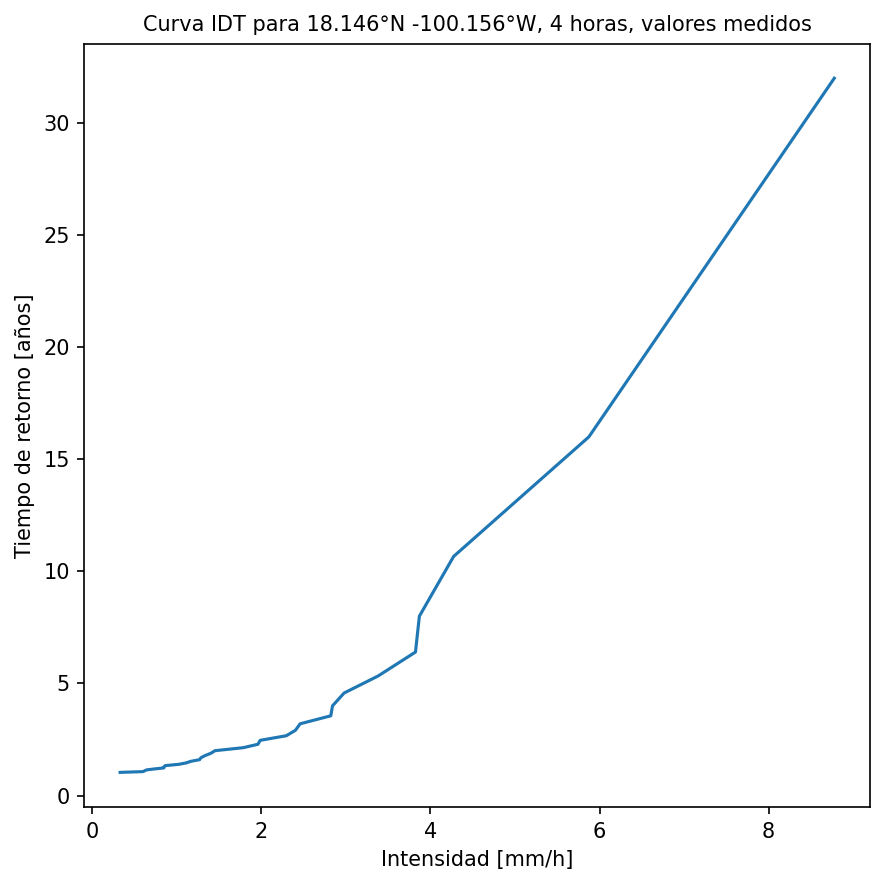

In [314]:
# Graficar una sola duración.

df_i_dur = ds_i.isel( {"LONGITUD": W, "LATITUD": N}
    ).sel( {"DURACION": D} ).to_dataframe()

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Declaramos variables.
x = df_i_dur["INTENSIDAD"] * p_D
y = df_i_dur.index

# Graficamos.
ax.plot(x, y)

# Estilo.
# Nombre de ejes.
ax.set_xlabel(f"{p_name} [{pre}]")
ax.set_ylabel("Tiempo de retorno [años]")
# Título.
ax.set_title( f"Curva IDT para {LAT:.3f}°N {LON:.3f}°W, {D} horas, {ret}",
    size = 10 )

fig.tight_layout()
plt.show()

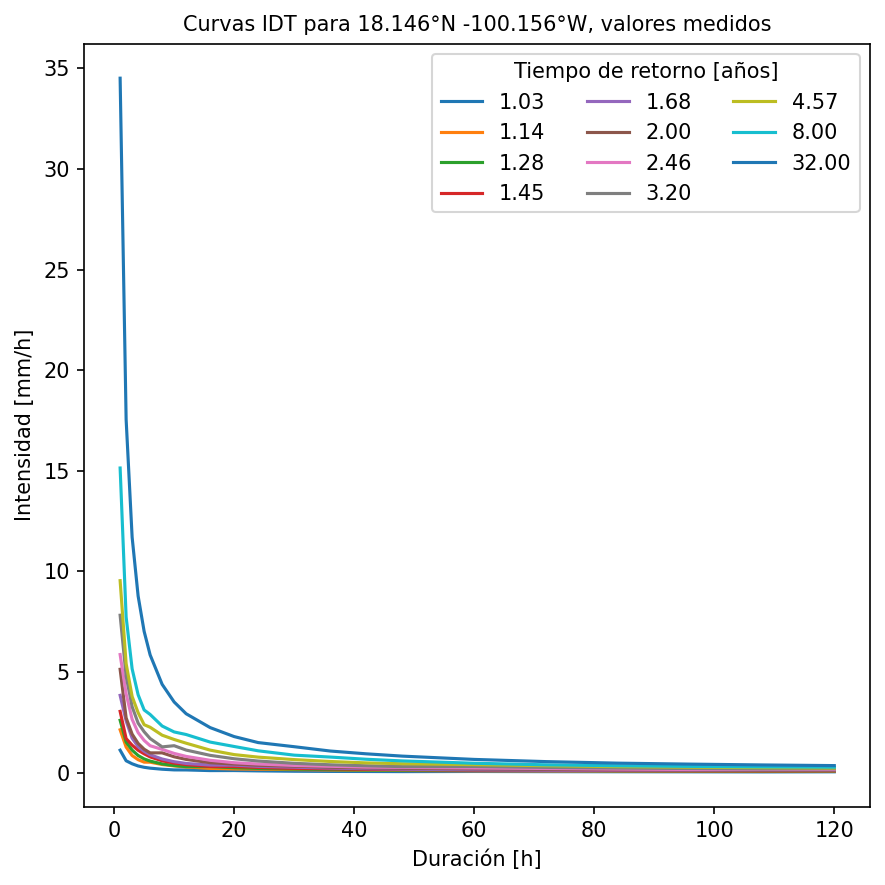

In [315]:
# Graficar todas las duraciones.

# Cantidad de tiempos de retorno a saltarse.
if RET: S = 3
else  : S = 1 

df_i = ds_i.isel( {"LONGITUD": W, "LATITUD": N} ).to_dataframe()
df_i = df_i.unstack( level = 1 )["INTENSIDAD"]
if RET: df_i.columns = [f"{x:.2f}" for x in df_i.columns]
else: df_i.columns = df_i.columns.astype(int)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos.
if PRE:
    df_i.loc[:, :] = ( df_i.values.transpose()
        *
        #/
        df_i.index.values ).transpose()
ax.plot(df_i.iloc[:, ::S])

# Estilo.
# Nombre de ejes.
ax.set_xlabel("Duración [h]")
ax.set_ylabel(f"{p_name} [{pre}]")
# Leyendas.
ax.legend(df_i.columns[::S], title = "Tiempo de retorno [años]", ncol = 3)
# Título.
ax.set_title(f"Curvas IDT para {LAT:.3f}°N {LON:.3f}°W, {ret}", size = 10)

fig.tight_layout()
plt.show()

In [316]:
df_i

,1.03,1.07,1.10,1.14,1.19,1.23,1.28,1.33,1.39,1.45,...,3.20,3.56,4.00,4.57,5.33,6.40,8.00,10.67,16.00,32.00
DURACION,,,,,,,,,,,,,,,,,,,,,
1,1.114532,1.869293,2.115526,2.127411,2.147125,2.190308,2.601776,2.698563,2.895630,3.043579,...,7.823059,8.065613,8.173492,9.540771,10.184662,11.475716,15.140423,15.516647,21.258575,34.517365
2,0.588333,1.109207,1.188171,1.270691,1.449173,1.497276,1.519028,1.596344,1.655579,1.691769,...,4.798462,4.890381,5.207764,5.417702,6.479145,7.124199,7.737471,8.174721,11.442841,17.552322
3,0.437907,0.797811,0.817271,0.848798,0.977061,1.106944,1.115977,1.142619,1.149785,1.362844,...,3.278524,3.471843,3.667641,3.784404,4.413785,4.751089,5.158314,5.683762,7.630310,11.702312
4,0.329308,0.601639,0.619629,0.642201,0.733047,0.846573,0.848770,0.862366,1.022194,1.111053,...,2.458893,2.820732,2.841583,2.978201,3.381306,3.822861,3.868892,4.274471,5.873825,8.776733
5,0.264142,0.481433,0.495905,0.519701,0.587158,0.677502,0.680920,0.708575,0.817859,0.934194,...,2.030615,2.304517,2.307245,2.382561,2.705045,3.063806,3.114213,3.460532,4.706958,7.021387
6,0.221273,0.408142,0.433091,0.518016,0.523773,0.565038,0.572830,0.592227,0.685328,0.780414,...,1.694010,1.924973,2.073507,2.254314,2.649529,2.849099,2.890012,3.059232,3.923757,5.851156
8,0.168159,0.325020,0.328296,0.402660,0.423912,0.426598,0.431339,0.480968,0.516434,0.587752,...,1.278603,1.451874,1.690736,1.860291,2.198931,2.304027,2.316401,2.840193,2.964775,4.388367
10,0.134879,0.262791,0.264551,0.331268,0.339130,0.344049,0.351218,0.414615,0.431900,0.472307,...,1.337384,1.358147,1.602762,1.646790,1.764720,1.856348,2.021408,2.272154,2.371909,3.510693
12,0.132431,0.220866,0.222134,0.278992,0.282608,0.286708,0.296145,0.367710,0.390327,0.398051,...,1.120758,1.143618,1.335635,1.461884,1.483109,1.664853,1.893462,1.989001,2.254910,2.925578
